![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


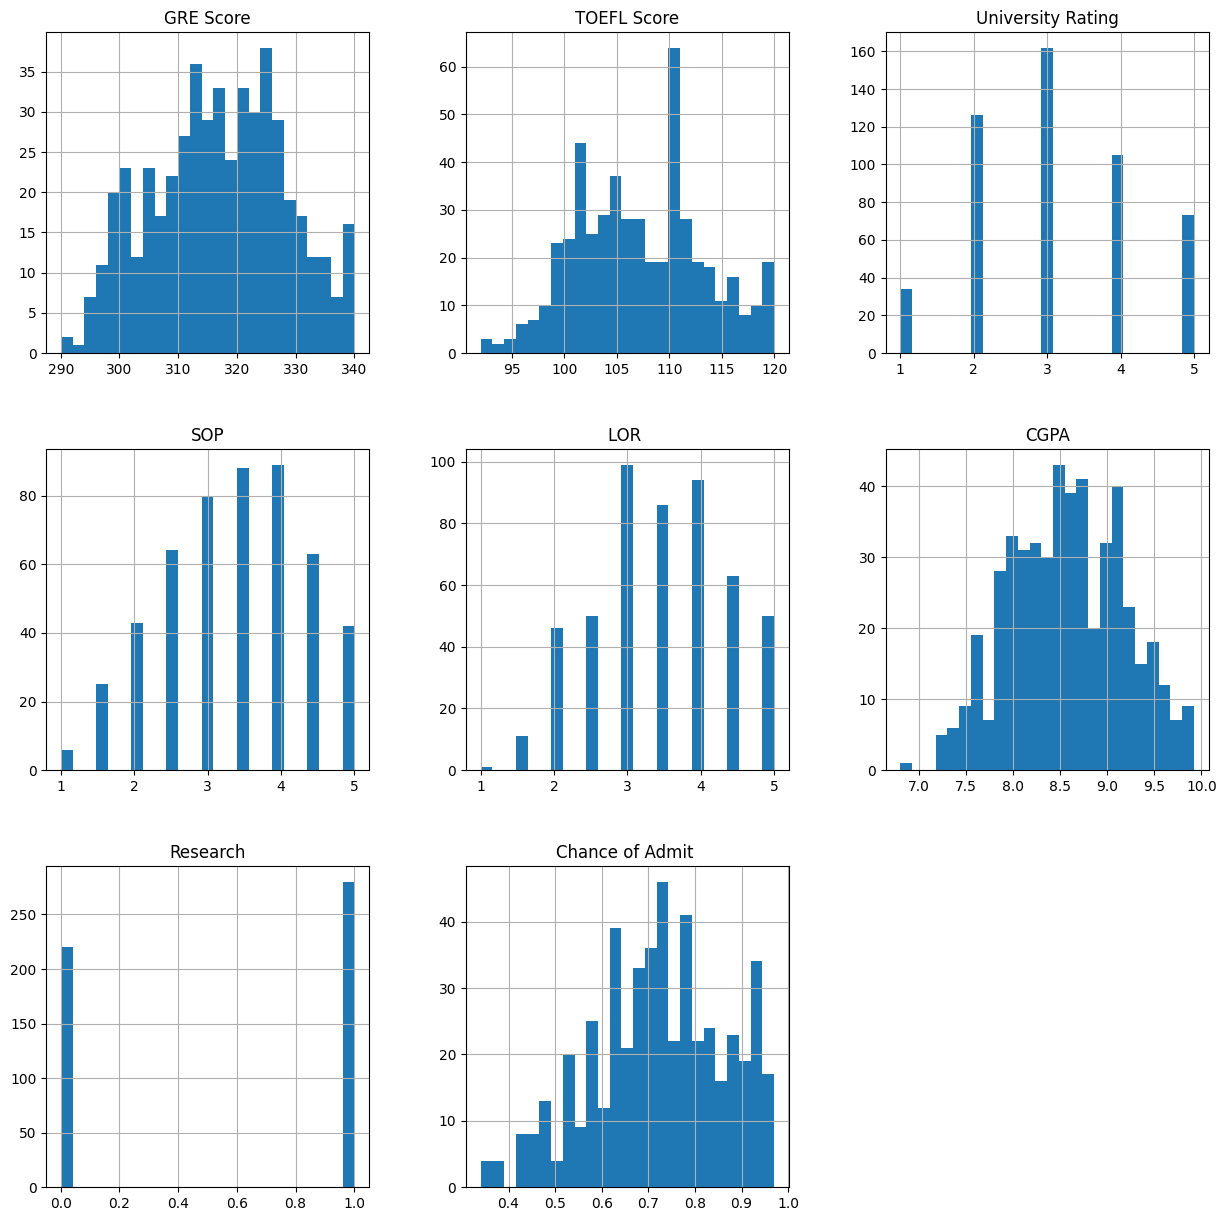

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
data.describe

<bound method NDFrame.describe of             GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   
...               ...          ...                ...  ...   ...   ...   
496               332          108                  5  4.5   4.0  9.02   
497               337          117                  5  5.0   5.0  9.87   
498               330          120                  5  4.5   5.0  9.56   
499               312          103                  4  4.0   5.0  8.43   
500               327          113                  4  4.5   4.5  9.04   

   

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)

# Normalizar el dataset
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_normalized,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

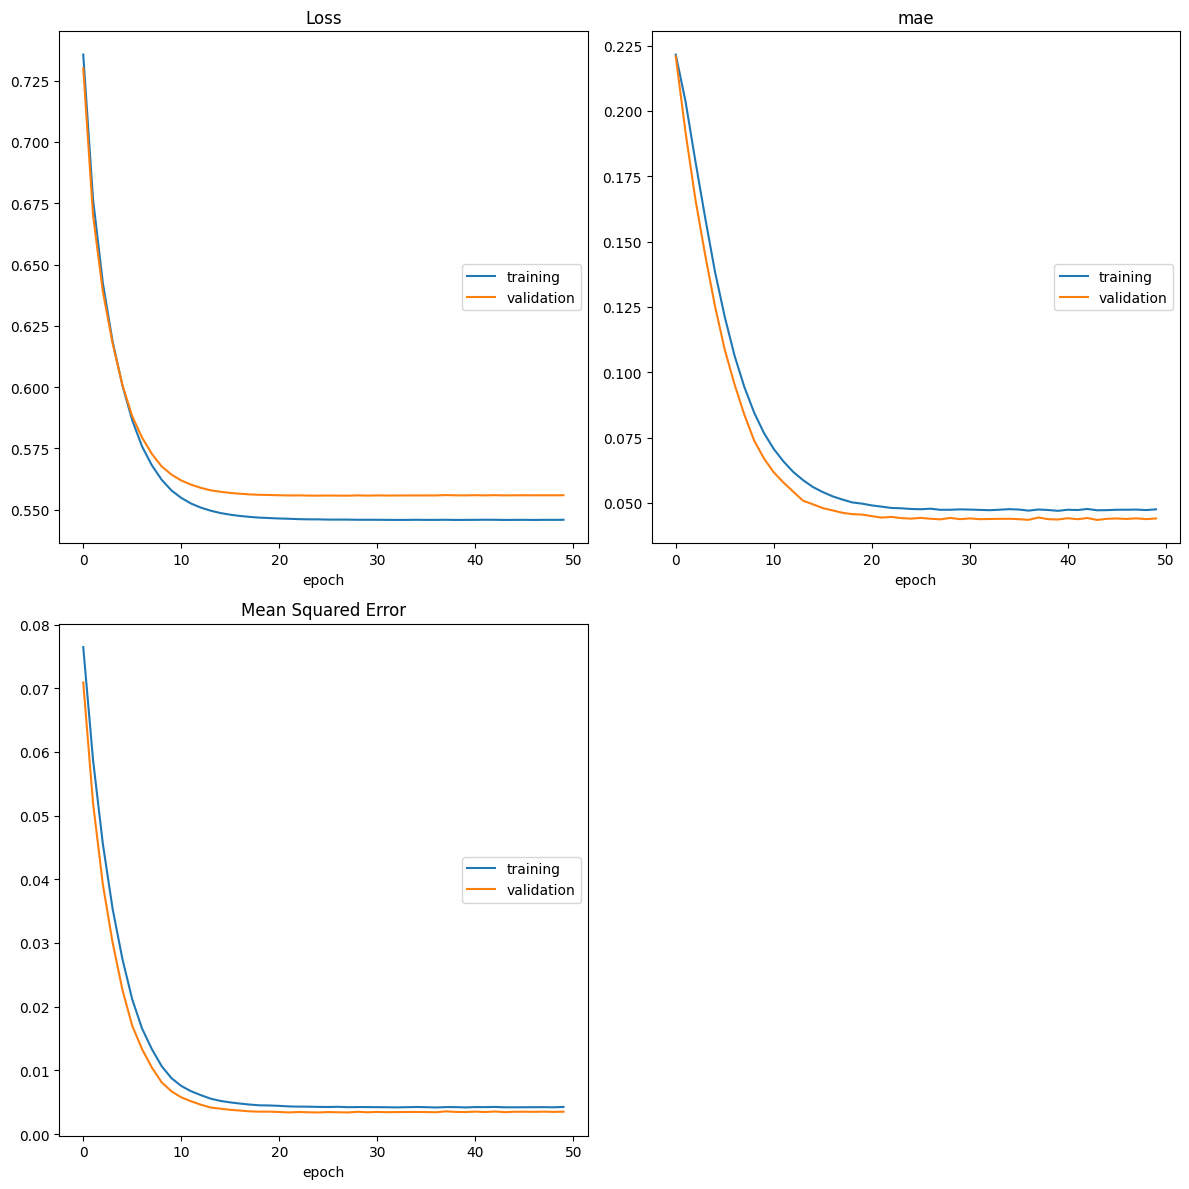

Loss
	training         	 (min:    0.546, max:    0.736, cur:    0.546)
	validation       	 (min:    0.556, max:    0.730, cur:    0.556)
mae
	training         	 (min:    0.047, max:    0.222, cur:    0.048)
	validation       	 (min:    0.043, max:    0.221, cur:    0.044)
Mean Squared Error
	training         	 (min:    0.004, max:    0.076, cur:    0.004)
	validation       	 (min:    0.003, max:    0.071, cur:    0.004)
11/11 [==============================] - 0s 45ms/step - loss: 0.5459 - mae: 0.0475 - mse: 0.0042 - val_loss: 0.5559 - val_mae: 0.0440 - val_mse: 0.0035
Train MAE: 0.05, Train MSE: 0.00
Test MAE: 0.04, Test MSE: 0.00


In [8]:
# Celda 1
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.optimizers import Adam
import time

# Definición red neuronal con la función Sequential()  secuencial con una capa densa (completamente conectada) 
#de una neurona, que recibe como entrada el número de variables predictoras y tiene una función de activación sigmoidal.
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
      
# Impresión de la arquitectura de la red neuronal
print(model.summary())
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['mae', 'mse'])
# Entrenamiento de la red neuronal con 50 épocas y con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

start_time = time.time() # registro del tiempo actual
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])
end_time = time.time() # registro del tiempo actual
training_time1 = end_time - start_time # cálculo del tiempo de entrenamiento
# Evaluar el modelo en los sets de entrenamiento y test
train_loss, train_mae, train_mse = model.evaluate(xTrain, yTrain, verbose=0)
test_loss, test_mae, test_mse = model.evaluate(xTest, yTest, verbose=0)

# Imprimir el MAE y MSE en los sets de entrenamiento y test
print(f'Train MAE: {train_mae:.2f}, Train MSE: {train_mse:.2f}')
print(f'Test MAE: {test_mae:.2f}, Test MSE: {test_mse:.2f}')


## Análisis Punto 1
* Función de pérdida 'binary_crossentropy':
En este caso, el problema que se está abordando es de regresión, donde se busca predecir la probabilidad de admisión de los estudiantes; por lo que se utiliza para la predicción de los valores de salida en el rango [0,1]. La entropía cruzada binaria mide la discrepancia entre la distribución de probabilidad actual y la distribución de probabilidad objetivo (en este caso, la distribución de probabilidad objetivo es la variable de salida binaria que indica si el estudiante fue admitido o no). Al utilizar una función de pérdida de entropía cruzada binaria, se está minimizando la discrepancia entre la distribución de probabilidad predicha y la distribución de probabilidad objetivo.

* Optimizador 'Adam':
Adam es un optimizador popular utilizado para actualizar los pesos de una red neuronal durante el entrenamiento. Este optimizador adapta la tasa de aprendizaje para cada parámetro en función de la media y la varianza de los gradientes recientes. En términos simples, Adam ajusta la tasa de aprendizaje de forma adaptativa para cada parámetro, lo que puede conducir a una convergencia más rápida y a una mejor generalización del modelo.

* Tasa de aprendizaje (learning rate) de 0.01:
La tasa de aprendizaje es un hiperparámetro importante en el entrenamiento de redes neuronales. Controla la cantidad en que se ajustan los pesos de la red en cada iteración de entrenamiento. Una tasa de aprendizaje alta puede llevar a una divergencia del modelo, mientras que una tasa de aprendizaje baja puede llevar a una convergencia lenta. En este caso, se ha elegido una tasa de aprendizaje de 0.01 para el optimizador Adam después de probar varios valores y observar una buena convergencia en el modelo.
* 50 épocas de entrenamiento:
El número de épocas en el entrenamiento de una red neuronal es un hiperparámetro importante. Una época es una pasada completa del conjunto de entrenamiento a través de la red neuronal. Entrenar durante más épocas puede llevar a una mejora en la precisión del modelo, pero también puede llevar a un sobreajuste (overfitting) del modelo en el conjunto de entrenamiento. En este caso, se ha elegido entrenar la red neuronal durante 50 épocas, lo que proporciona suficiente tiempo para que el modelo aprenda patrones en los datos de entrenamiento y alcance una buena precisión sin sobreajustarse.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

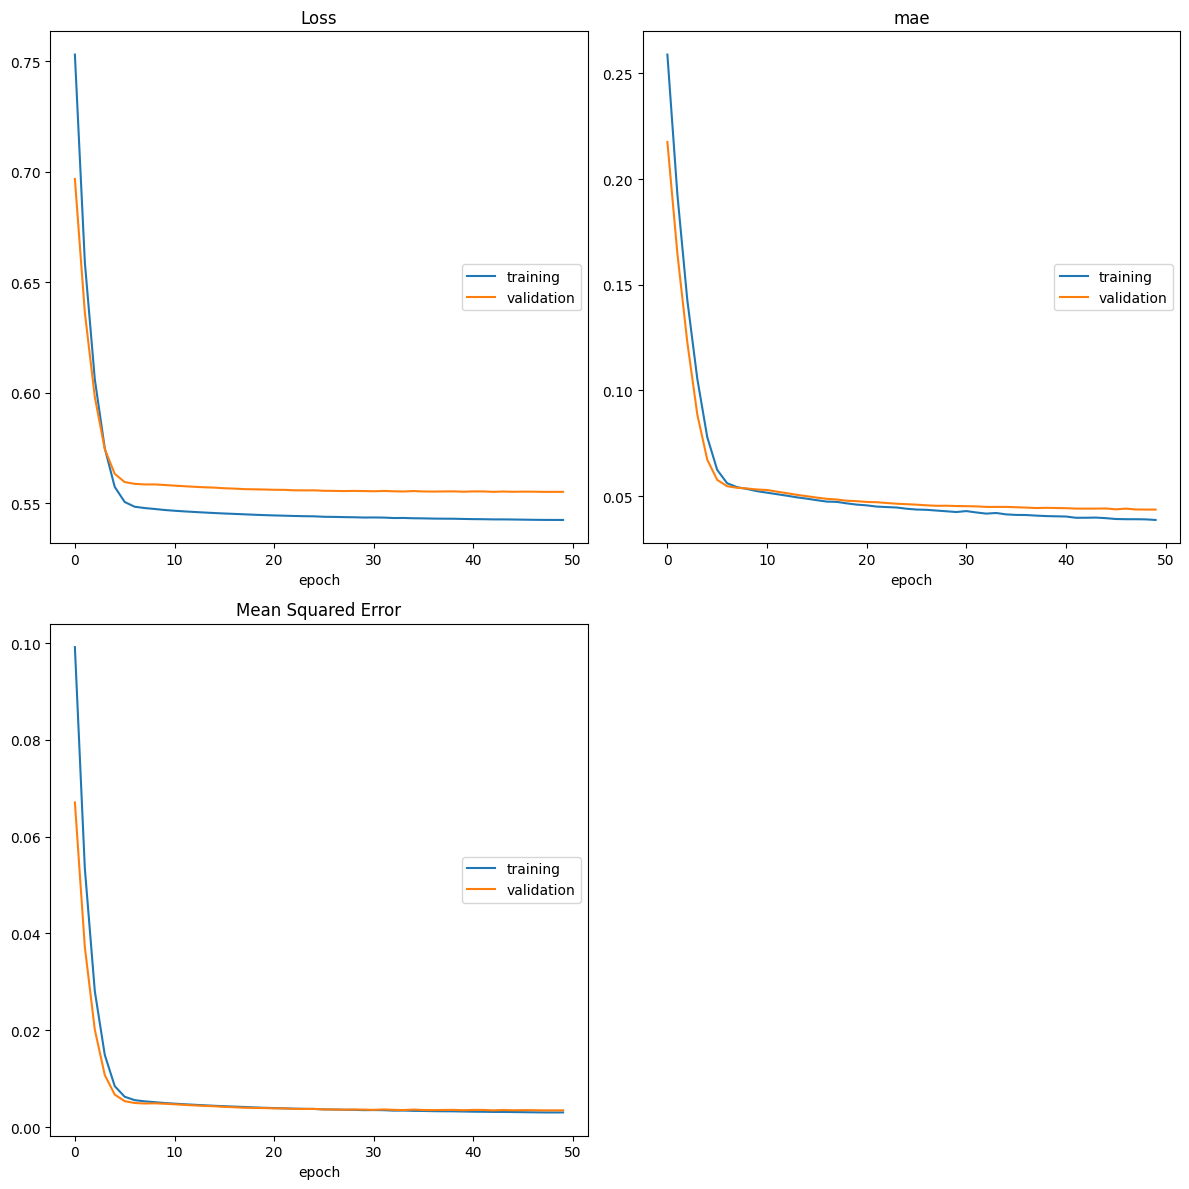

Loss
	training         	 (min:    0.542, max:    0.753, cur:    0.542)
	validation       	 (min:    0.555, max:    0.697, cur:    0.555)
mae
	training         	 (min:    0.039, max:    0.259, cur:    0.039)
	validation       	 (min:    0.044, max:    0.218, cur:    0.044)
Mean Squared Error
	training         	 (min:    0.003, max:    0.099, cur:    0.003)
	validation       	 (min:    0.003, max:    0.067, cur:    0.003)
11/11 [==============================] - 0s 39ms/step - loss: 0.5424 - mae: 0.0387 - mse: 0.0030 - val_loss: 0.5551 - val_mae: 0.0436 - val_mse: 0.0034
Train MAE: 0.04, Train MSE: 0.00
Test MAE: 0.04, Test MSE: 0.00


In [9]:
# Celda 2
# Definición del modelo con dos capas ocultas de 32 neuronas cada una
model = Sequential()
model.add(Dense(32, input_dim=xTrain.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Compilación del modelo con la función de pérdida binary_crossentropy, el optimizador Adam y las métricas MAE y MSE
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'mse'])
# Entrenamiento de la red neuronal con 50 épocas y con las métricas MAE y MSE
start_time = time.time() # registro del tiempo actual
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()]) 
end_time = time.time() # registro del tiempo actual
training_time2 = end_time - start_time # cálculo del tiempo de entrenamiento
# Evaluar el modelo en los sets de entrenamiento y test
train_loss2, train_mae2, train_mse2 = model.evaluate(xTrain, yTrain, verbose=0)
test_loss2, test_mae2, test_mse2 = model.evaluate(xTest, yTest, verbose=0)

# Imprimir el MAE y MSE en los sets de entrenamiento y test
print(f'Train MAE: {train_mae2:.2f}, Train MSE: {train_mse2:.2f}')
print(f'Test MAE: {test_mae2:.2f}, Test MSE: {test_mse2:.2f}')



# Análisis Punto 2
Se ha utilizado una red neuronal con dos capas ocultas de 32 neuronas cada una. La primera capa oculta utiliza una función de activación ReLU, que es comúnmente utilizada en redes neuronales. La última capa utiliza una función de activación sigmoide, ya que se trata de una tarea de clasificación binaria.

En cuanto a la función de pérdida, el optimizador y las métricas utilizadas, se han seleccionado los mismos que en el modelo anterior, ya que proporcionaron buenos resultados en esa ocasión.

En cuanto al número de épocas, se ha vuelto a utilizar un valor de 50, ya que se considera que proporciona suficiente tiempo para que el modelo aprenda patrones en los datos de entrenamiento y alcance una buena precisión sin sobreajustarse. En cuanto al número de neuronas, se ha elegido un valor de 32 para ambas capas, que es un valor comúnmente utilizado en redes neuronales.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

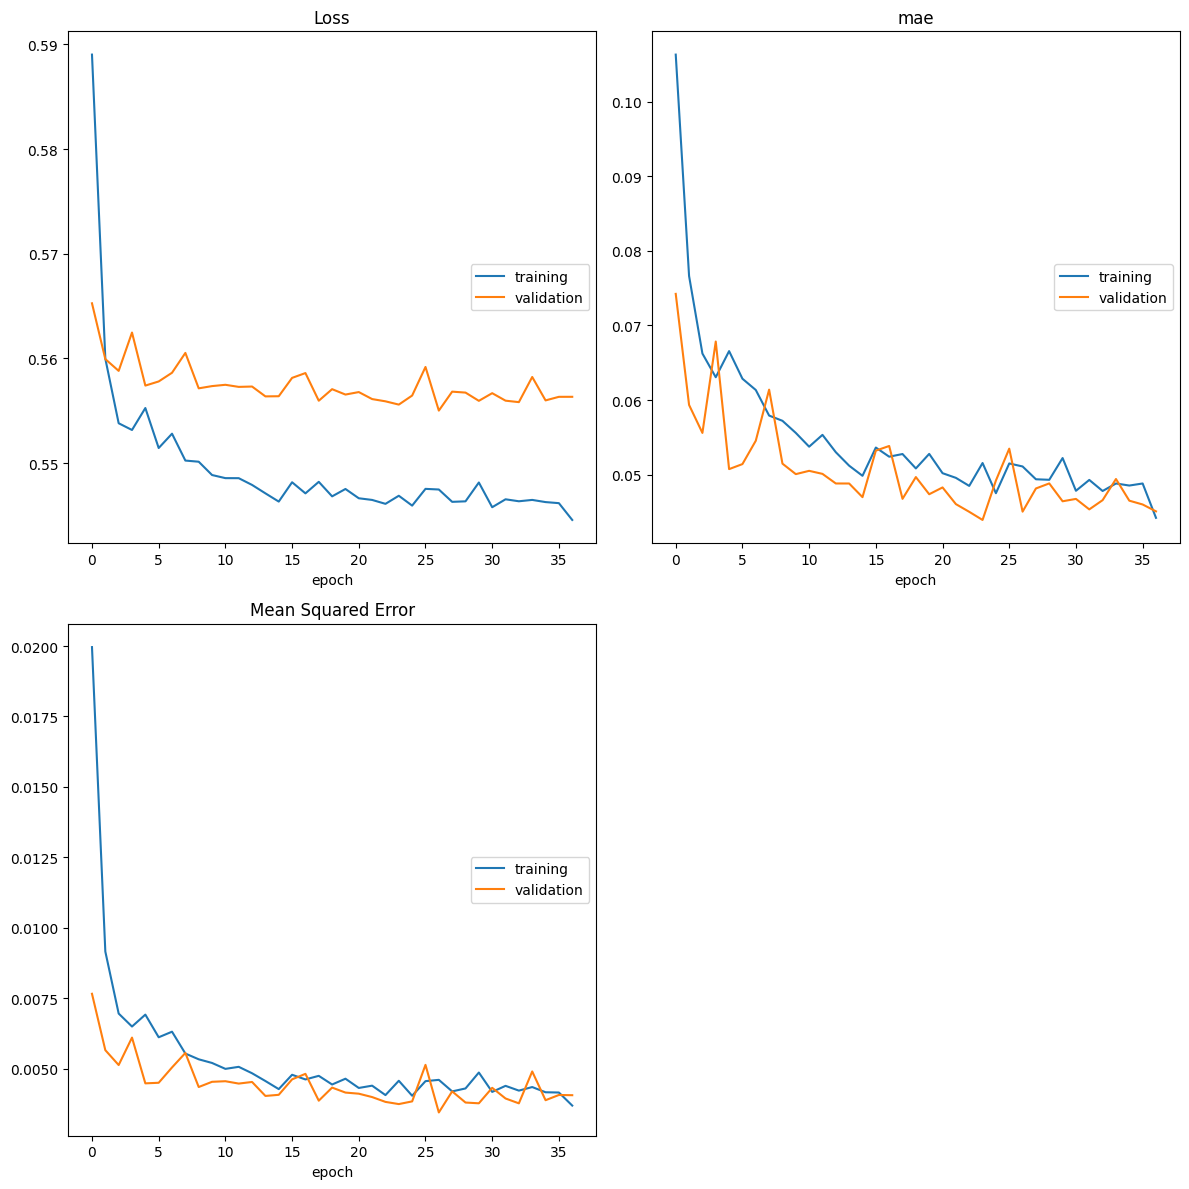

Loss
	training         	 (min:    0.545, max:    0.589, cur:    0.545)
	validation       	 (min:    0.555, max:    0.565, cur:    0.556)
mae
	training         	 (min:    0.044, max:    0.106, cur:    0.044)
	validation       	 (min:    0.044, max:    0.074, cur:    0.045)
Mean Squared Error
	training         	 (min:    0.004, max:    0.020, cur:    0.004)
	validation       	 (min:    0.003, max:    0.008, cur:    0.004)
11/11 [==============================] - 0s 44ms/step - loss: 0.5446 - mae: 0.0442 - mse: 0.0037 - val_loss: 0.5563 - val_mae: 0.0451 - val_mse: 0.0041
Epoch 37: early stopping
Train MAE: 0.04, Train MSE: 0.00
Test MAE: 0.05, Test MSE: 0.00


In [19]:
# Celda 3
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Definición del modelo
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Definición de función de perdida y optimizador
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['mae', 'mse'])

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Impresión de la arquitectura de la red neuronal
print(model.summary())
# Entrenamiento de la red neuronal con 50 épocas y con las métricas MAE y MSE
start_time = time.time() # registro del tiempo actual
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), es]) 
end_time = time.time() # registro del tiempo actual
training_time3 = end_time - start_time # cálculo del tiempo de entrenamiento

# Evaluar el modelo en los sets de entrenamiento y test
train_loss3, train_mae3, train_mse3 = model.evaluate(xTrain, yTrain, verbose=0)
test_loss3, test_mae3, test_mse3 = model.evaluate(xTest, yTest, verbose=0)

# Imprimir el MAE y MSE en los sets de entrenamiento y test
print(f'Train MAE: {train_mae3:.2f}, Train MSE: {train_mse3:.2f}')
print(f'Test MAE: {test_mae3:.2f}, Test MSE: {test_mse3:.2f}')


# Análisis Punto 3

Los hiperparámetros en este modelo son:
* Número de neuronas en la capa oculta 1 (128)
* Número de neuronas en la capa oculta 2 (64)
* Función de activación en la capa oculta (relu)
* Función de activación en la capa de salida (sigmoid)
* Porcentaje de dropout en la capa oculta (0.5)

Los mismos se han esogido con el fin de mejorar el modelo en ocasión que: 

1. Usar dos capas ocultas con funciones de activación "relu" permite al modelo capturar patrones más complejos en los datos, lo que puede mejorar la precisión de las predicciones.
2. El uso de dropout en ambas capas ocultas ayuda a reducir el riesgo de overfitting, lo que también puede mejorar la precisión del modelo en datos nuevos.
3. El número de neuronas en cada capa se ha elegido de manera que sea suficientemente grande para capturar patrones complejos en los datos, pero no tan grande que el modelo se vuelva demasiado complejo y sea propenso a overfitting.
4. La función de activación "sigmoid" en la capa de salida es adecuada para este problema de clasificación binaria, ya que produce una salida entre 0 y 1 que se puede interpretar como la probabilidad de que un estudiante sea admitido.

Adicionalmente, se añadió la condición de parada temprana (early stopping) que monitorea la perdida del conjunto de validación y busca que sea mínima. Esta condición nos hizo ahorrar 13 épocas en el entrenamiento pues tenía contempladas 50 épocas en los hiperparámetros pero, paró en la época 37.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

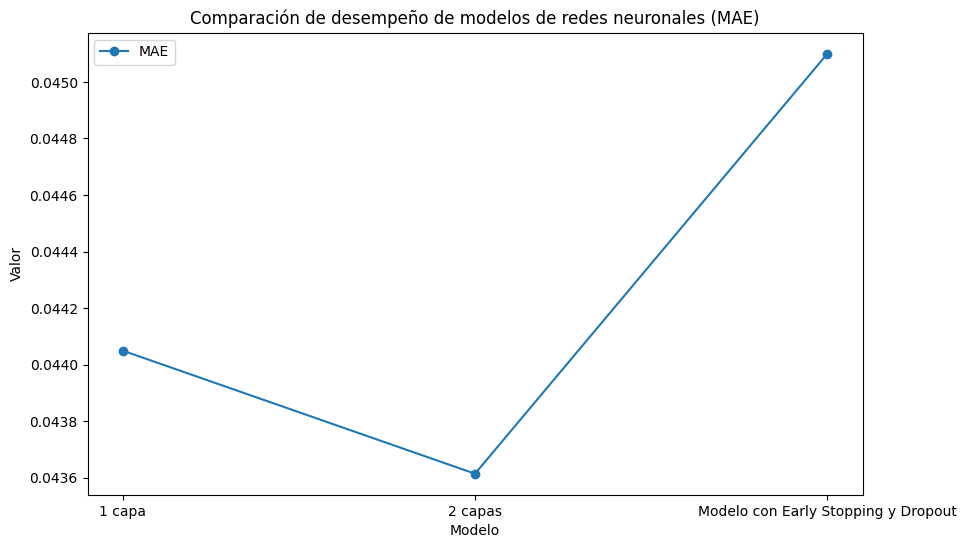

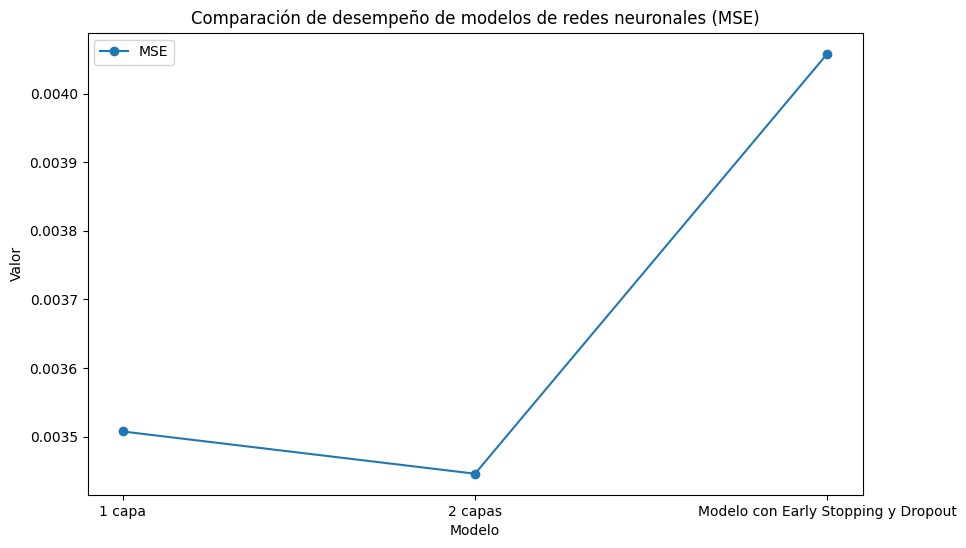

In [20]:
# Celda 4
# Definimos las métricas para cada modelo
mae_scores = [test_mae, test_mae2, test_mae3]
mse_scores = [test_mse, test_mse2, test_mse3]
model_names = ['1 capa', '2 capas', 'Modelo con Early Stopping y Dropout']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(model_names, mae_scores, 'o-', label='MAE')

# Agregamos título y etiquetas a los ejes
ax.set_title('Comparación de desempeño de modelos de redes neuronales (MAE)')
ax.set_xlabel('Modelo')
ax.set_ylabel('Valor')
ax.legend()
plt.show()


# Definimos las métricas para cada modelo
mae_scores = [test_mae, test_mae2, test_mae3]
mse_scores = [test_mse, test_mse2, test_mse3]
model_names = ['1 capa', '2 capas', 'Modelo con Early Stopping y Dropout']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(model_names, mse_scores, 'o-', label='MSE')

# Agregamos título y etiquetas a los ejes
ax.set_title('Comparación de desempeño de modelos de redes neuronales (MSE)')
ax.set_xlabel('Modelo')
ax.set_ylabel('Valor')
ax.legend()
plt.show()



In [21]:
import pandas as pd

# Crear un DataFrame con las métricas de desempeño de cada modelo
df_metrics = pd.DataFrame({
    'Modelo de una capa': [test_mae, test_mse,training_time1],
    'Modelo de dos capas': [test_mae2, test_mse2,training_time2],
    'Modelo con Early Stopping y Dropout': [test_mae3, test_mse3,training_time3]
}, index=['MAE', 'MSE','Time'])

df_metrics

,Modelo de una capa,Modelo de dos capas,Modelo con Early Stopping y Dropout
MAE,0.044050,0.043614,0.045100
MSE,0.003507,0.003446,0.004058
Time,24.026765,22.152439,17.987160


# Análisis Punto 4

Los tres modelos tienen un buen desempeño en la tarea de predecir la probabilidad de admisión de los estudiantes, dado que las métricas MAE y MSE son muy bajas. Sin embargo, podemos ver que el modelo de una capa y el modelo de dos capas tienen un desempeño muy similar, mientras que el modelo con Early Stopping y Dropout tiene un desempeño un poco peor.

Una ventaja del modelo de una capa es que es más sencillo y fácil de entrenar, lo que lo hace más rápido para experimentar con diferentes hiperparámetros. Sin embargo, una desventaja es que podría no ser suficientemente complejo para capturar patrones más complejos en los datos como se logra evidenciar puesto que el modelo de 2 capas es ligeramente mejor que el de una capa.

Por otro lado, el modelo con más capas, Early Stopping y Dropout tiene algunas ventajas importantes al usar técnicas para evitar el sobreajuste, lo que puede resultar en un modelo más robusto que generalice mejor a nuevos datos y también el early stopping hace que finalice el entrenamiento más rápido que las otras dos versiones entrenadas en este taller (finaliza en 37 epocas, 13 menos que las otras dos versiones). Sin embargo, una desventaja es que es más complejo y por lo tanto puede ser más difícil de entrenar y hacer que converja por su inestabilidad (esto se ve claramente en las gráficas del train y validation loss a medida que avanzan las épochs).